## Imports

In [7]:
import pandas as pd
import numpy as np
import sqlite3
import os
import joblib

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# ML evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Define database and transformers paths
db_path = "../database/ELECTIONS.db"
db_dir = os.path.dirname(db_path)
preprocessor_path = os.path.join(db_dir, 'preprocessor_X.joblib')
label_encoder_path = os.path.join(db_dir, 'label_encoder_y.joblib')

# Connect to the database
conn = sqlite3.connect(db_path)

# Load the processed data from the database
train_df = pd.read_sql('SELECT * FROM PROCESSED_TRAIN_DATA', conn)
test_df = pd.read_sql('SELECT * FROM PROCESSED_TEST_DATA', conn)

print("Loaded data from database:")
print(f"Training data shape: {train_df.shape}")
print(f"Testing data shape: {test_df.shape}")

# Load the transformers
preprocessor_X = joblib.load(preprocessor_path)
label_encoder_y = joblib.load(label_encoder_path)

print("\nSuccessfully loaded preprocessor and label encoder.")

Loaded data from database:
Training data shape: (148, 95)
Testing data shape: (38, 95)

Successfully loaded preprocessor and label encoder.


In [9]:
# The target column is named 'WINNER_encoded'
target_column = 'WINNER_encoded'

X_train = train_df.drop(target_column, axis=1)
y_train = train_df[target_column]

X_test = test_df.drop(target_column, axis=1)
y_test = test_df[target_column]

print("Data separated into X and y sets:")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Data separated into X and y sets:
X_train shape: (148, 94)
y_train shape: (148,)
X_test shape: (38, 94)
y_test shape: (38,)


In [10]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=label_encoder_y.classes_, output_dict=True)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'report': report,
        'y_pred': y_pred
    }
    
    print(f'--- {name} ---\n')
    print(f'Accuracy: {accuracy:.4f}\n')
    # Print text report
    print(classification_report(y_test, y_pred, target_names=label_encoder_y.classes_))
    print("---------------------\n\n")

--- Logistic Regression ---

Accuracy: 0.7105

              precision    recall  f1-score   support

      CENTRE       0.69      1.00      0.81        22
      DROITE       1.00      0.25      0.40         4
    E.DROITE       0.80      0.67      0.73         6
      GAUCHE       0.00      0.00      0.00         6

    accuracy                           0.71        38
   macro avg       0.62      0.48      0.49        38
weighted avg       0.63      0.71      0.63        38

---------------------


--- Random Forest ---

Accuracy: 0.5263

              precision    recall  f1-score   support

      CENTRE       0.59      0.77      0.67        22
      DROITE       0.33      0.25      0.29         4
    E.DROITE       0.67      0.33      0.44         6
      GAUCHE       0.00      0.00      0.00         6

    accuracy                           0.53        38
   macro avg       0.40      0.34      0.35        38
weighted avg       0.48      0.53      0.49        38

------------------

/Users/hich/Desktop/Bureau - MacbookAir HICHAM/PRO/GIT/epsi-mspr-1/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hich/Desktop/Bureau - MacbookAir HICHAM/PRO/GIT/epsi-mspr-1/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hich/Desktop/Bureau - MacbookAir HICHAM/PRO/GIT/epsi-mspr-1/venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

--- Gradient Boosting ---

Accuracy: 0.4737

              precision    recall  f1-score   support

      CENTRE       0.64      0.64      0.64        22
      DROITE       0.20      0.25      0.22         4
    E.DROITE       0.75      0.50      0.60         6
      GAUCHE       0.00      0.00      0.00         6

    accuracy                           0.47        38
   macro avg       0.40      0.35      0.36        38
weighted avg       0.51      0.47      0.49        38

---------------------


--- SVM ---

Accuracy: 0.6316

              precision    recall  f1-score   support

      CENTRE       0.61      1.00      0.76        22
      DROITE       0.00      0.00      0.00         4
    E.DROITE       1.00      0.33      0.50         6
      GAUCHE       0.00      0.00      0.00         6

    accuracy                           0.63        38
   macro avg       0.40      0.33      0.31        38
weighted avg       0.51      0.63      0.52        38

---------------------




/Users/hich/Desktop/Bureau - MacbookAir HICHAM/PRO/GIT/epsi-mspr-1/venv/lib/python3.13/site-packages/xgboost/training.py:183: UserWarning: [17:50:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


--- XGBoost ---

Accuracy: 0.6053

              precision    recall  f1-score   support

      CENTRE       0.72      0.82      0.77        22
      DROITE       0.33      0.25      0.29         4
    E.DROITE       0.75      0.50      0.60         6
      GAUCHE       0.17      0.17      0.17         6

    accuracy                           0.61        38
   macro avg       0.49      0.43      0.45        38
weighted avg       0.60      0.61      0.59        38

---------------------




/var/folders/sp/w9p124nd6jb9srzf94f0v2q80000gn/T/ipykernel_57557/4112979148.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')


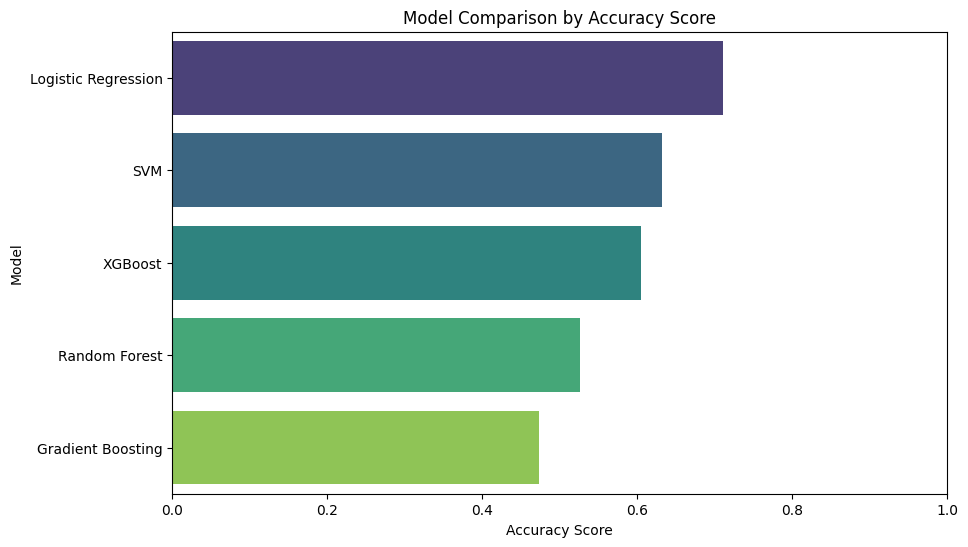

Model Performance Summary:
                 Model  Accuracy
0  Logistic Regression  0.710526
1                  SVM  0.631579
2              XGBoost  0.605263
3        Random Forest  0.526316
4    Gradient Boosting  0.473684


In [11]:
accuracy_df = pd.DataFrame([
    {'Model': name, 'Accuracy': res['accuracy']}
    for name, res in results.items()
])

accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title('Model Comparison by Accuracy Score')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.xlim(0, 1.0)
plt.show()

print("Model Performance Summary:")
print(accuracy_df)